In [1]:
!pip install -q rdflib
!pip install -q transliterate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 865.8 kB/s eta 0:00:00


In [2]:
from rdflib import URIRef, BNode, Literal, Namespace, Graph, RDF, XSD
from transliterate import translit
import pandas as pd

In [3]:
g = Graph()
g.parse('kish_atc.rdf')

<Graph identifier=N0dcf773e43be44f58f0bdbf9ba266344 (<class 'rdflib.graph.Graph'>)>

In [4]:
all_classes = g.query("""
    ASK WHERE {?s ?p ?o}
""")


In [5]:
for i in all_classes:
  print(i)

True


In [6]:
# Посмотрим на все доступные триплеты
all = g.query("""
  SELECT ?subject ?predicate ?object
  WHERE {?subject ?predicate ?object}

""")
for row in all:
  print(row)

(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#Person_name'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subPropertyOf'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#topDataProperty'))
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#Character'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'))
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Ontology'))
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#contains'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'))
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#havePerson'), rdflib.term.URIRef('http://www.w3.org/2000/01/rd

In [7]:
# Album subclass
all_albums = g.query("""
    SELECT ?album
    WHERE {
        ?album rdfs:subClassOf ?Album.
    }
""")


In [8]:
for row in all_albums:
    print(row["album"])

http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11#Track
http://www.semanticweb.org/mosto/ontologies/kish#Character


In [9]:
# Classes
album_class = URIRef("http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11#Album")
track_class = URIRef("http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11#Track")
character_class = URIRef("http://www.semanticweb.org/mosto/ontologies/kish#Character")

# Properties
cont = URIRef("http://www.semanticweb.org/mosto/ontologies/kish#contains")
havePerson = URIRef("http://www.semanticweb.org/mosto/ontologies/kish#havePerson")

# Attributes
album_name_attr = URIRef("http://www.semanticweb.org/mosto/ontologies/kish#Album_name")
track_name_attr = URIRef("http://www.semanticweb.org/mosto/ontologies/kish#Track_name")
character_name_attr = URIRef("http://www.semanticweb.org/mosto/ontologies/kish#Person_name")

In [10]:
def new_album(album_name):
  new_album = URIRef(f"http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/{album_name}")
  g.add((new_album, RDF.type, album_class))
  g.add((new_album, album_name_attr, Literal(album_name, lang="en")))

def new_track(track_name, album_name):
  new_track = URIRef(f"http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/{track_name}")
  new_album = URIRef(f"http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/{album_name}")

  g.add((new_track, RDF.type, track_class))
  g.add((new_track, track_name_attr, Literal(track_name, lang="en")))
  g.add((new_album, cont, new_track))

def new_character(track_name, character_name):
  new_track = URIRef(f"http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/{track_name}")
  new_character = URIRef(f"http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/characters/{character_name}")

  g.add((new_character, RDF.type, character_class))
  g.add((new_character, character_name_attr, Literal(character_name, lang="en")))
  g.add((new_track, havePerson, new_character))


In [11]:
all_info = pd.read_excel('/content/korol_i_shut_songs_3.xlsx')

In [12]:
all_info

,group_name,album_name,year,track,persons
0,Король и Шут,Акустический альбом,1999,Кукла колдуна,"Мужчина, женщина"
1,Король и Шут,Акустический альбом,1999,Наблюдатель,"Мужчина, женщина"
2,Король и Шут,Акустический альбом,1999,Бедняжка,"Мужчина, женщина"
3,Король и Шут,Акустический альбом,1999,Прыгну со скалы,Мужчина
4,Король и Шут,Акустический альбом,1999,Девушка и Граф,"Девушка, граф"
...,...,...,...,...,...
163,Король и Шут,Жаль - нет ружья!,2002,Вино Хоббитов,Хоббиты
164,Король и Шут,Жаль - нет ружья!,2002,Разборки из-за Баб,Бандиты
165,Король и Шут,Жаль - нет ружья!,2002,Утопленник,"Неизвестный, утопленник"
166,Король и Шут,Жаль - нет ружья!,2002,Медведь,Медведь


In [13]:
all_info.persons = all_info.persons.astype(str).apply(lambda x: x.split(', '))

In [14]:
grouped_albums = all_info.groupby('album_name', as_index=False).agg({'track': list})
grouped_albums

,album_name,track
0,TODD - Акт 1. «Праздник Крови»,"[Добрые Люди (Хор нищих), Баллада о Бедном Цир..."
1,TODD - Акт 2. «На Краю»,"[Смерть на балу (Ария Солиста и Тодда), Малень..."
2,Акустический альбом,"[Кукла колдуна, Наблюдатель, Бедняжка, Прыгну ..."
3,Бунт на корабле,"[Хардкор по-русски, Волшебный глаз старика Ало..."
4,Жаль - нет ружья!,"[Волоскрад, Мёртвый Анархист, Смешной Совет, Н..."
5,Как в старой сказке,"[Гимн Шута, Проклятый Старый Дом, Тайна Хозяйк..."
6,Камнем по Голове,"[Смельчак и Ветер, Проказник Скоморох, Верная ..."
7,Король и Шут,"[Король и Шут, Два друга, Сапоги, Охотник, Пан..."
8,Продавец Кошмаров,"[Марионетки, Маска, Ром, Гробовщик, Дочка Вурд..."
9,Театр Демона,"[Послание, Театральный демон, Киногерой, Фокус..."


In [15]:
grouped_albums.album_name = grouped_albums.album_name.apply(lambda x: '_'.join(x.split(' ')))
grouped_albums.track = grouped_albums.track.apply(lambda x: ['_'.join(i.split(' ')) for i in x])

In [16]:
for i in grouped_albums.album_name.tolist():
  new_album(i)
  for k in grouped_albums.loc[grouped_albums['album_name'] == i]['track'].item():
    new_track(k, i)

In [17]:
tracks_persons = all_info[['track', 'persons']]
tracks_persons.track = tracks_persons.track.apply(lambda x: '_'.join(x.split(' ')))
tracks_persons.persons = tracks_persons.persons.apply(lambda x: [i.lower() for i in x])
tracks_persons.persons = tracks_persons.persons.apply(lambda x: ['_'.join(i.split(' ')) for i in x])

<ipython-input-17-eee5ac5eb96b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_persons.track = tracks_persons.track.apply(lambda x: '_'.join(x.split(' ')))
<ipython-input-17-eee5ac5eb96b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_persons.persons = tracks_persons.persons.apply(lambda x: [i.lower() for i in x])
<ipython-input-17-eee5ac5eb96b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [18]:
unique_characters = tracks_persons.persons.explode().unique().tolist()

In [19]:
for i, k in zip(tracks_persons.track.tolist(), tracks_persons.persons.tolist()):
    for l in unique_characters:
      if l in k:
       new_character(i, l)

In [ ]:
g.serialize(destination="kish_albums_tracks_persons.rdf")

<Graph identifier=N49127b1959f44484924ef43ab8155db4 (<class 'rdflib.graph.Graph'>)>

### Данные добавлены, с помощью запросов посмотрим, что получилось


In [20]:
# Посмотрим на все доступные триплеты
all = g.query("""
  SELECT ?subject ?predicate ?object
  WHERE {?subject ?predicate ?object}
  LIMIT 10
""")
for row in all:
  print(row)

(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Бунтарь'), rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#havePerson'), rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/characters/бунтарь'))
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/characters/толпа'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#Character'))
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Продавец_Кошмаров'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11#Track'))
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Кукольный_Театр'), rdflib.t

In [21]:
# Посмотрим на все доступные предикаты
all_preds = g.query("""
  SELECT DISTINCT ?predicate
  WHERE {?subject ?predicate ?object}
""")
for row in all_preds:
  print(row)

(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#havePerson'),)
(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),)
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#contains'),)
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#Person_name'),)
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#Track_name'),)
(rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subPropertyOf'),)
(rdflib.term.URIRef('http://www.semanticweb.org/mosto/ontologies/kish#Album_name'),)
(rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'),)


In [22]:
# Посмотрим на все имеющиеся альбомы
all_albums = g.query("""
    SELECT ?album
    WHERE {
        ?album rdf:type <http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11#Album>
    }
""")

for row in all_albums:
  print(row['album'])

http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/TODD_-_Акт_1._«Праздник_Крови»
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/TODD_-_Акт_2._«На_Краю»
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/Акустический_альбом
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/Бунт_на_корабле
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/Жаль_-_нет_ружья!
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/Как_в_старой_сказке
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/Камнем_по_Голове
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/Король_и_Шут
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/Продавец_Кошмаров
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/Театр_Демона
http://www

In [23]:
# Посмотрим на список треков с некоторых альбомов

some_tracks_v1 =  g.query("""

    PREFIX kish: <http://www.semanticweb.org/mosto/ontologies/kish#>
    PREFIX album_1: <http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/>

    SELECT ?track
    WHERE {
      album_1:Камнем_по_Голове
      kish:contains
      ?track
    }
""")

for row in some_tracks_v1:
  print(row['track'])

http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Смельчак_и_Ветер
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Проказник_Скоморох
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Верная_Жена
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Садовник
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Блуждают_Тени
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Внезапная_Голова
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Шар_Голубой
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Злодей_и_Шапка
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/От_Женщин_Кругом_Голова
http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/Рыбак
http://www.semanticweb.org/mosto/ontologies/2023/10/unt

### Часть 2

In [24]:
!pip install -q tensorflow ampligraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

In [25]:
import ampligraph
from sklearn.model_selection import train_test_split


In [35]:
triples = []


for subject, predicate, tobject in g.triples((None, None, None)):
    if 'albums' in subject:
      subject = subject.replace('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/albums/', "")
    elif 'tracks' in subject:
      subject = subject.replace('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/', "")
    elif 'characters' in subject:
      subject = subject.replace('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/characters/', "")
    predicate = predicate.split("#")[1]
    if '#' in tobject:
      tobject = tobject.split("#")[1]
    elif 'tracks' in tobject:
      tobject = tobject.replace('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/tracks/', "")
    elif 'characters' in tobject:
      tobject = tobject.replace('http://www.semanticweb.org/mosto/ontologies/2023/10/untitled-ontology-11/characters/', "")
    triples.append([subject, predicate, tobject])

df = pd.DataFrame(triples, columns=['Subject', 'Predicate', 'Object'])


In [36]:
df

,Subject,Predicate,Object
0,Бунтарь,havePerson,бунтарь
1,толпа,type,Character
2,Продавец_Кошмаров,type,Track
3,Кукольный_Театр,type,Track
4,Театр_Демона,contains,Тёмный_Учитель
...,...,...,...
1058,Екатерина,Track_name,Екатерина
1059,торговец,Person_name,торговец
1060,Внезапная_Голова,havePerson,голова
1061,Рогатый,type,Track


In [37]:
df.Object = df.Object.apply(lambda x: translit(x, language_code='ru', reversed=True).replace("'", ""))
df.Subject = df.Subject.apply(lambda x: translit(x, language_code='ru', reversed=True).replace("'", ""))

In [38]:
df = df.drop(df[df['Subject'].str.contains('http')].index)

In [39]:
df

,Subject,Predicate,Object
0,Buntar,havePerson,buntar
1,tolpa,type,Character
2,Prodavets_Koshmarov,type,Track
3,Kukolnyj_Teatr,type,Track
4,Teatr_Demona,contains,Temnyj_Uchitel
...,...,...,...
1058,Ekaterina,Track_name,Ekaterina
1059,torgovets,Person_name,torgovets
1060,Vnezapnaja_Golova,havePerson,golova
1061,Rogatyj,type,Track


In [40]:
X_train, X_test = train_test_split(df, test_size=0.3)

In [41]:
X_train.shape, X_test.shape

((735, 3), (315, 3))

### Model

In [82]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel


Epoch 1/10
736/736 [==============================] - 5s 7ms/step - loss: 1.3782
Epoch 2/10
736/736 [==============================] - 2s 3ms/step - loss: 1.3617
Epoch 3/10
736/736 [==============================] - 1s 2ms/step - loss: 1.3304
Epoch 4/10
736/736 [==============================] - 2s 3ms/step - loss: 1.2848
Epoch 5/10
736/736 [==============================] - 2s 3ms/step - loss: 1.2327
Epoch 6/10
736/736 [==============================] - 1s 2ms/step - loss: 1.1815
Epoch 7/10
736/736 [==============================] - 1s 2ms/step - loss: 1.1375
Epoch 8/10
736/736 [==============================] - 1s 2ms/step - loss: 1.0994
Epoch 9/10
736/736 [==============================] - 1s 2ms/step - loss: 1.0694
Epoch 10/10
736/736 [==============================] - 2s 3ms/step - loss: 1.0436
Epoch 1/10
736/736 [==============================] - 3s 4ms/step - loss: 4.7272
Epoch 2/10
736/736 [==============================] - 1s 2ms/step - loss: 3.4463
Epoch 3/10
736/736 [=======

In [44]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

In [99]:
def scores(scoring_type, train_data, test_data):
  model = ScoringBasedEmbeddingModel(k=50, eta=2, scoring_type=scoring_type)

  model.compile(optimizer='adam', loss='nll')
  model.fit(X_train, epochs=10)

  ranks = model.evaluate(X_test, use_filter={'test': np.concatenate((X_train, X_test))})
  mr = mr_score(ranks)
  mrr = mrr_score(ranks)

  print("MRR: %.2f" % (mrr)) # Среднее значение обратного ранга (больше - лучше)
  print("MR: %.2f" % (mr)) # Среднее значение корректного триплета (меньше - лучше)

  hits_5 = hits_at_n_score(ranks, n=5) # Доля корректных триплетов попавших в топ 5 после ранжирования
  hits_10 = hits_at_n_score(ranks, n=10)
  hits_20 = hits_at_n_score(ranks, n=20)

  print("Hits@5: %.2f" % (hits_5))
  print("Hits@10: %.2f" % (hits_10))
  print("Hits@20: %.2f" % (hits_20))

  return model

In [100]:
model_complex = scores('ComplEx', X_train, X_test)

Epoch 1/10
736/736 [==============================] - 3s 4ms/step - loss: 2.7553
Epoch 2/10
736/736 [==============================] - 1s 2ms/step - loss: 2.7178
Epoch 3/10
736/736 [==============================] - 1s 2ms/step - loss: 2.6466
Epoch 4/10
736/736 [==============================] - 3s 4ms/step - loss: 2.5311
Epoch 5/10
736/736 [==============================] - 3s 4ms/step - loss: 2.4067
Epoch 6/10
736/736 [==============================] - 6s 8ms/step - loss: 2.2910
Epoch 7/10
736/736 [==============================] - 5s 7ms/step - loss: 2.1986
Epoch 8/10
736/736 [==============================] - 3s 4ms/step - loss: 2.1180
Epoch 9/10
736/736 [==============================] - 2s 3ms/step - loss: 2.0499
Epoch 10/10
736/736 [==============================] - 1s 2ms/step - loss: 1.9964

10 triples containing invalid keys skipped!

10 triples containing invalid keys skipped!
11/11 [==============================] - 2s 155ms/step
MRR: 0.38
MR: 92.29
Hits@5: 0.40
Hits@10: 0.

In [101]:
model_transe = scores('TransE', X_train, X_test)

Epoch 1/10
736/736 [==============================] - 3s 4ms/step - loss: 9.3142
Epoch 2/10
736/736 [==============================] - 1s 2ms/step - loss: 6.8919
Epoch 3/10
736/736 [==============================] - 1s 2ms/step - loss: 5.7105
Epoch 4/10
736/736 [==============================] - 1s 2ms/step - loss: 5.0002
Epoch 5/10
736/736 [==============================] - 1s 2ms/step - loss: 4.5356
Epoch 6/10
736/736 [==============================] - 2s 3ms/step - loss: 4.2112
Epoch 7/10
736/736 [==============================] - 1s 2ms/step - loss: 3.9729
Epoch 8/10
736/736 [==============================] - 1s 2ms/step - loss: 3.7892
Epoch 9/10
736/736 [==============================] - 1s 2ms/step - loss: 3.6427
Epoch 10/10
736/736 [==============================] - 1s 2ms/step - loss: 3.5246

10 triples containing invalid keys skipped!

10 triples containing invalid keys skipped!
11/11 [==============================] - 1s 105ms/step
MRR: 0.60
MR: 37.85
Hits@5: 0.61
Hits@10: 0.

In [46]:
!pip install -q adjustText==0.8

In [54]:
from sklearn.decomposition import PCA
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Clustering

In [88]:
subj = df.Subject.unique()
embeddings = dict(zip(subj, model_transe.get_embeddings(subj, embedding_type='e')))


3 entities with invalid keys skipped!


In [89]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in embeddings.values()]))

In [90]:
from sklearn.cluster import KMeans
from ampligraph.discovery import find_clusters

In [91]:
clustering_algorithm = KMeans(n_clusters=3, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(subj, model_transe, clustering_algorithm, mode='e')



3 entities with invalid keys skipped!


In [92]:
df_clusters = pd.DataFrame({"subj": subj[:len(clusters)],
                            "clusters": "cluster" + pd.Series(clusters).astype(str),
                            "embedding1": embeddings_2d[:, 0],
                            "embedding2": embeddings_2d[:, 1]})

In [93]:
def plot_clusters(data, hue):
  plt.figure(figsize=(12, 12))
  plt.title("Cluster embeddings")
  ax = sns.scatterplot(data=data, x="embedding1", y="embedding2", hue=hue)
  texts = []
  for i, point in data.iterrows():
    texts.append(plt.text(point['embedding1'], point['embedding2'], str(point['subj'])))
  adjust_text(texts)


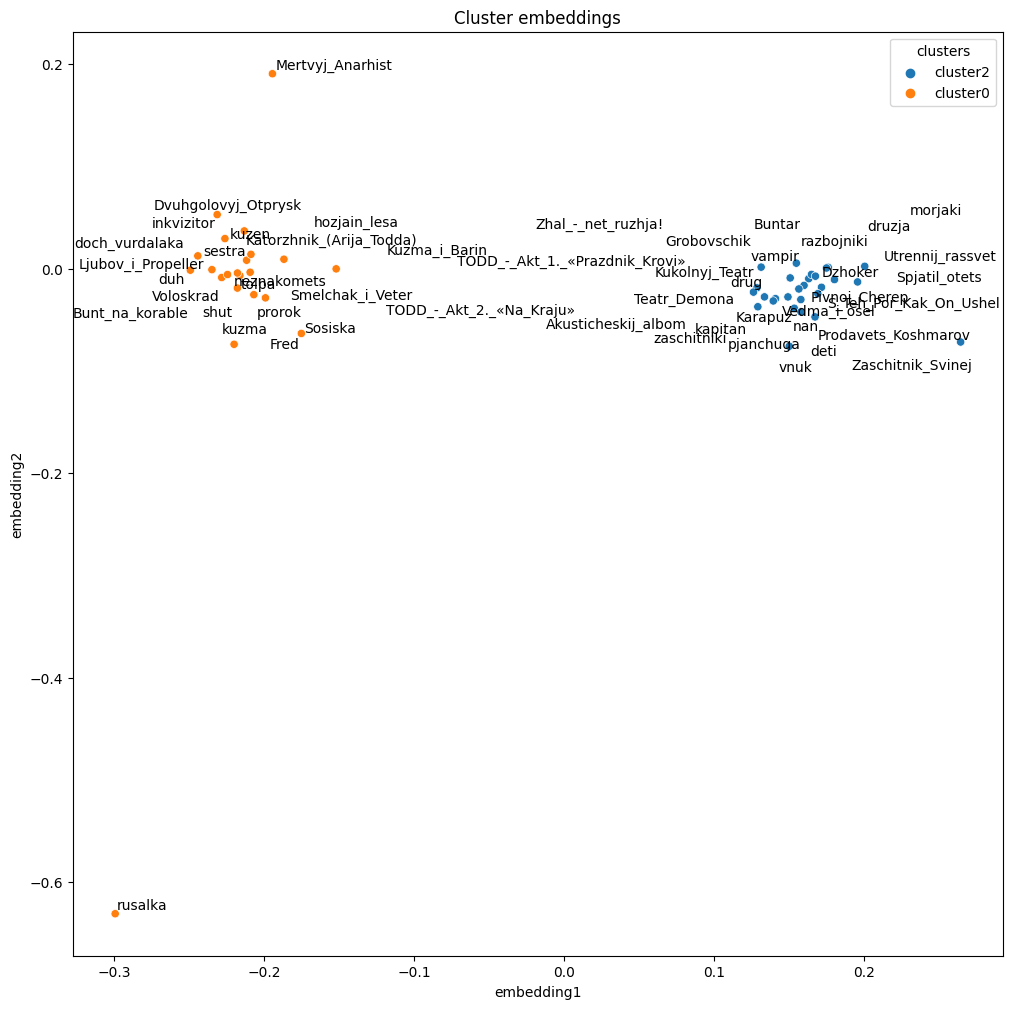

In [94]:
plot_clusters(df_clusters.head(50), 'clusters')

### Link prediction

In [104]:
df_l = pd.DataFrame(X_train, columns=['Subject', 'Predicate', 'Object'])

In [127]:
df_l

,Subject,Predicate,Object
167,Sadovnik,type,Track
174,Utoplennik,havePerson,neizvestnyj
679,endi_kaufman,Person_name,endi_kaufman
14,Vedma_i_osel,havePerson,vedma
364,Teatralnyj_demon,havePerson,demon
...,...,...,...
286,Akusticheskij_albom,contains,Prygnu_so_skaly
684,Istinnyj_ubijtsa,havePerson,paren
1045,Durak_i_Molnija,havePerson,durak
690,tvari,Person_name,tvari


In [107]:
to_drop = 'Sadovnik'

In [108]:
df_l[df_l.Subject == to_drop]

,Subject,Predicate,Object
167,Sadovnik,type,Track
402,Sadovnik,havePerson,sestry
165,Sadovnik,havePerson,sadovnik
287,Sadovnik,havePerson,paren


In [110]:
df_filtered = df_l[df_l.Subject != to_drop]

In [133]:
statements = np.array([
    [f'{to_drop}', 'type', 'Track'],
    [f'{to_drop}', 'havePerson', 'paren'],
    [f'{to_drop}', 'havePerson', 'sadovnik'],
    [f'{to_drop}', 'type', 'Character'],
    [f'{to_drop}', 'havePerson', 'lesnik'],
    [f'{to_drop}', 'havePerson', 'durak'],
    [f'{to_drop}', 'Person_name', 'tvari'],
])

In [134]:
statements_filter = {'test': np.array(list({tuple(i) for i in np.vstack((df_filtered, statements))}))}

In [135]:
ranks_statements = model_transe.evaluate(df_filtered,
                                         use_filter=statements_filter
                                         )

24/24 [==============================] - 4s 163ms/step


In [136]:
scores = model_transe.predict(statements)
scores

array([-0.70996094, -0.61480093, -0.9990017 , -2.591839  , -0.9196713 ,
       -0.88845235, -2.5882878 ], dtype=float32)

In [137]:
from scipy.special import expit
probs = expit(scores)

pd.DataFrame(list(zip([' '.join(x) for x in statements],
                      ranks_statements,
                      np.squeeze(scores),
                      np.squeeze(probs))),
             columns=['statement', 'rank', 'score', 'prob']).sort_values('prob', ascending=False)

,statement,rank,score,prob
1,Sadovnik havePerson paren,"[1, 1]",-0.614801,0.350965
0,Sadovnik type Track,"[34, 4]",-0.709961,0.329607
5,Sadovnik havePerson durak,"[1, 1]",-0.888452,0.291429
4,Sadovnik havePerson lesnik,"[28, 4]",-0.919671,0.285025
2,Sadovnik havePerson sadovnik,"[50, 64]",-0.999002,0.269138
6,Sadovnik Person_name tvari,"[3, 1]",-2.588288,0.069896
3,Sadovnik type Character,"[1, 4]",-2.591839,0.069665
